In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

hist_beg = '1985-01-01'
hist_end = '2005-12-31'

midcent_beg = '2040-01-01'
midcent_end = '2059-12-31'

endcent_beg = '2080-01-01'
endcent_end = '2099-12-31'

KtoC = 273.15

In [2]:
# Maximum temperature
tmax_ds_hist = xr.open_mfdataset('data/*tasmax*historical*.nc', combine='nested', concat_dim='model')
tmax_ds_hist['lon'] = tmax_ds_hist['lon'] - 360.0

tmax_ds_rcp45 = xr.open_mfdataset('data/*tasmax*rcp45*.nc', combine='nested', concat_dim='model')
tmax_ds_rcp45['lon'] = tmax_ds_rcp45['lon'] - 360.0

tmax_ds_rcp85 = xr.open_mfdataset('data/*tasmax*rcp85*.nc', combine='nested', concat_dim='model')
tmax_ds_rcp85['lon'] = tmax_ds_rcp85['lon'] - 360.0

# Minimum temperatures
tmin_ds_hist = xr.open_mfdataset('data/*tasmin*historical*.nc', combine='nested', concat_dim='model')
tmin_ds_hist['lon'] = tmax_ds_hist['lon'] - 360.0

tmin_ds_rcp45 = xr.open_mfdataset('data/*tasmin*rcp45*.nc', combine='nested', concat_dim='model')
tmin_ds_rcp45['lon'] = tmax_ds_rcp45['lon'] - 360.0

tmin_ds_rcp85 = xr.open_mfdataset('data/*tasmin*rcp85*.nc', combine='nested', concat_dim='model')
tmin_ds_rcp85['lon'] = tmax_ds_rcp85['lon'] - 360.0


In [3]:
# Get multi-model average historical seasonal cycle in maximum temperature
tmax_hist_mean = tmax_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().mean(dim='model')
tmax_hist_std = tmax_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in tmaxecipitation, 2040-2060
tmax_rcp45_mean_40_60 = tmax_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().mean(dim='model')
tmax_rcp45_std_40_60 = tmax_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in tmaxecipitation, 2080-2099
tmax_rcp45_mean_80_99 = tmax_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().mean(dim='model')
tmax_rcp45_std_80_99 = tmax_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().std(dim='model')

In [4]:
# Get domain-wide seasonal cycle - maximum temperature
tmax_seasonal_cycle_hist = tmax_hist_mean.air_temperature.mean(dim=('lat','lon')) - KtoC
tmax_seasonal_cycle_40_60 = tmax_rcp45_mean_40_60.air_temperature.mean(dim=('lat','lon')) - KtoC
tmax_seasonal_cycle_80_99 = tmax_rcp45_mean_80_99.air_temperature.mean(dim=('lat','lon')) - KtoC

tmax_seasonal_cycle_hist_std = tmax_hist_std.air_temperature.mean(dim=('lat','lon'))
tmax_seasonal_cycle_40_60_std = tmax_rcp45_std_40_60.air_temperature.mean(dim=('lat','lon'))
tmax_seasonal_cycle_80_99_std = tmax_rcp45_std_80_99.air_temperature.mean(dim=('lat','lon'))

tmax_seasonal_cycle_hist_np = tmax_seasonal_cycle_hist.values
tmax_seasonal_cycle_40_60_np = tmax_seasonal_cycle_40_60.values
tmax_seasonal_cycle_80_99_np = tmax_seasonal_cycle_80_99.values

tmax_seasonal_cycle_hist_std_np = tmax_seasonal_cycle_hist_std.values
tmax_seasonal_cycle_40_60_std_np = tmax_seasonal_cycle_40_60_std.values
tmax_seasonal_cycle_80_99_std_np = tmax_seasonal_cycle_80_99_std.values


In [5]:
# Get multi-model average historical seasonal cycle in minimum temperature
tmin_hist_mean = tmin_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().mean(dim='model')
tmin_hist_std = tmin_ds_hist.sel(time=slice(hist_beg, hist_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in tmaxecipitation, 2040-2060
tmin_rcp45_mean_40_60 = tmin_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().mean(dim='model')
tmin_rcp45_std_40_60 = tmin_ds_rcp45.sel(time=slice(midcent_beg, midcent_end))\
    .groupby('time.month').mean().std(dim='model')

# Get multi-model average seasonal cycle in tmaxecipitation, 2080-2099
tmin_rcp45_mean_80_99 = tmin_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().mean(dim='model')
tmin_rcp45_std_80_99 = tmin_ds_rcp45.sel(time=slice(endcent_beg, endcent_end))\
    .groupby('time.month').mean().std(dim='model')

In [6]:
# Get domain-wide seasonal cycle - maximum temperature
tmin_seasonal_cycle_hist = tmin_hist_mean.air_temperature.mean(dim=('lat','lon')) - KtoC
tmin_seasonal_cycle_40_60 = tmin_rcp45_mean_40_60.air_temperature.mean(dim=('lat','lon')) - KtoC
tmin_seasonal_cycle_80_99 = tmin_rcp45_mean_80_99.air_temperature.mean(dim=('lat','lon')) - KtoC

tmin_seasonal_cycle_hist_std = tmin_hist_std.air_temperature.mean(dim=('lat','lon'))
tmin_seasonal_cycle_40_60_std = tmin_rcp45_std_40_60.air_temperature.mean(dim=('lat','lon'))
tmin_seasonal_cycle_80_99_std = tmin_rcp45_std_80_99.air_temperature.mean(dim=('lat','lon'))

tmin_seasonal_cycle_hist_np = tmin_seasonal_cycle_hist.values
tmin_seasonal_cycle_40_60_np = tmin_seasonal_cycle_40_60.values
tmin_seasonal_cycle_80_99_np = tmin_seasonal_cycle_80_99.values

tmin_seasonal_cycle_hist_std_np = tmin_seasonal_cycle_hist_std.values
tmin_seasonal_cycle_40_60_std_np = tmin_seasonal_cycle_40_60_std.values
tmin_seasonal_cycle_80_99_std_np = tmin_seasonal_cycle_80_99_std.values


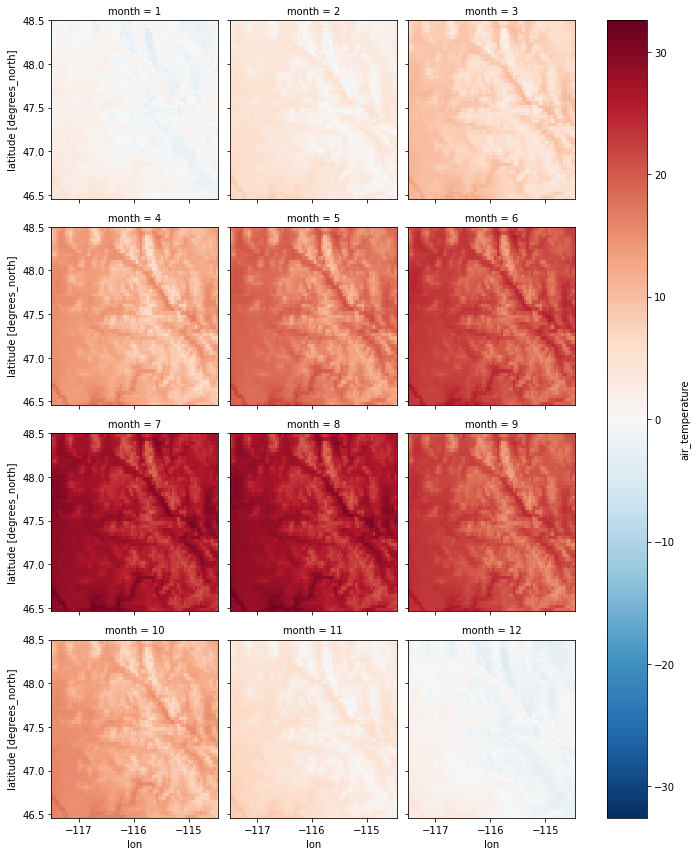

In [7]:
(tmax_hist_mean.air_temperature - KtoC).plot(col='month',col_wrap=3)

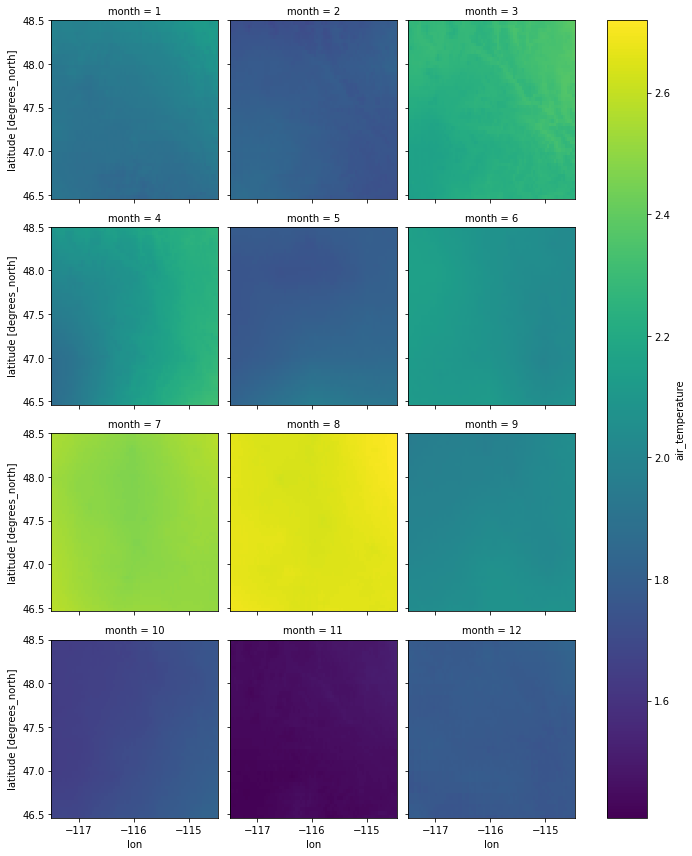

In [8]:
(tmax_rcp45_mean_40_60.air_temperature - tmax_hist_mean.air_temperature).plot(col='month',col_wrap=3)

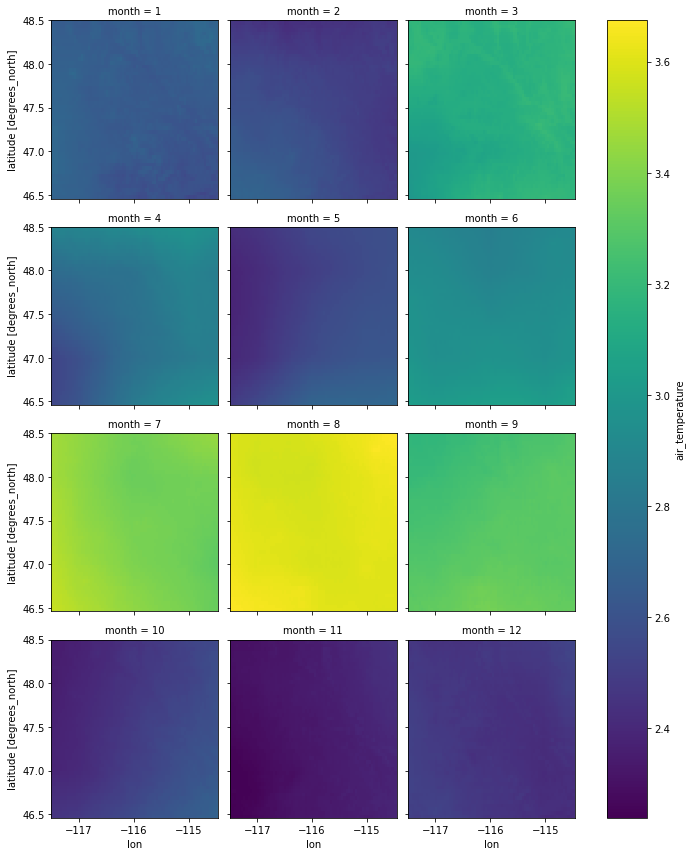

In [9]:
(tmax_rcp45_mean_80_99.air_temperature - tmax_hist_mean.air_temperature).plot(col='month',col_wrap=3)

## Plot Seasonal Cycle – Daily Maximum Temperature

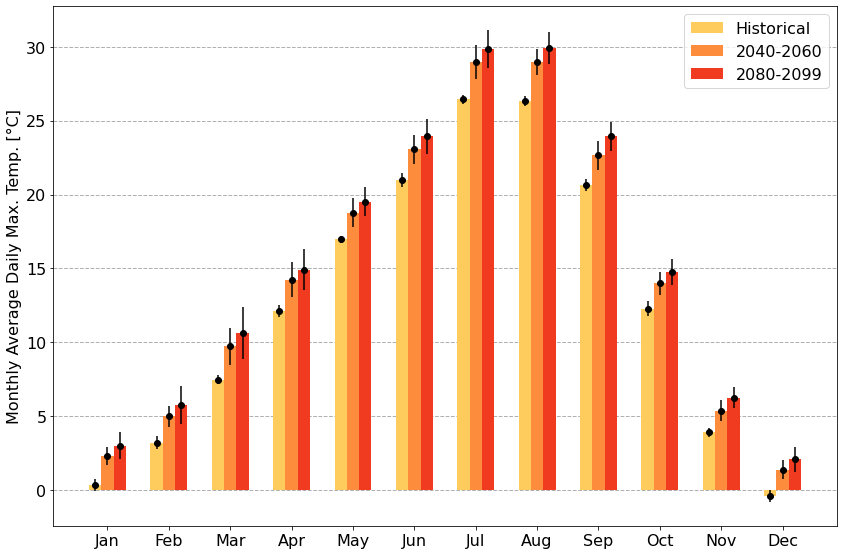

In [10]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width, tmax_seasonal_cycle_hist_np, width, label='Historical', color='#fecc5c', zorder=2.5)
rects2 = ax.bar(x, tmax_seasonal_cycle_40_60_np, width, label='2040-2060', color='#fd8d3c', zorder=2.5)
rects3 = ax.bar(x + width, tmax_seasonal_cycle_80_99_np, width, label='2080-2099', color='#f03b20', zorder=2.5)

rects1 = ax.errorbar(x - width, tmax_seasonal_cycle_hist_np, yerr=tmax_seasonal_cycle_hist_std_np, 
                     fmt='o', color='k', zorder=3)
rects2 = ax.errorbar(x, tmax_seasonal_cycle_40_60_np, yerr=tmax_seasonal_cycle_40_60_std_np,
                     fmt='o', color='k', zorder=3)
rects3 = ax.errorbar(x + width, tmax_seasonal_cycle_80_99_np, yerr=tmax_seasonal_cycle_80_99_std_np, 
                     fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Monthly Average Daily Max. Temp. [°C]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCycleTmax.png', bbox_inches='tight', dpi=300)
plt.show()

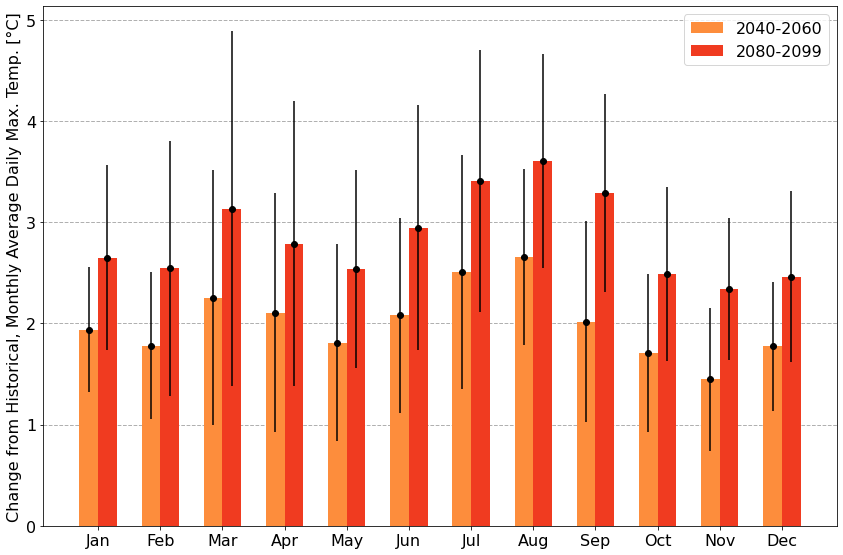

In [11]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, tmax_seasonal_cycle_40_60_np - tmax_seasonal_cycle_hist_np, width, 
                label='2040-2060', color='#fd8d3c', zorder=2.5)
rects2 = ax.bar(x + width/2, tmax_seasonal_cycle_80_99_np - tmax_seasonal_cycle_hist_np, width,
                label='2080-2099', color='#f03b20', zorder=2.5)

ax.errorbar(x - width/2, tmax_seasonal_cycle_40_60_np - tmax_seasonal_cycle_hist_np, 
                    yerr=tmax_seasonal_cycle_40_60_std_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + width/2, tmax_seasonal_cycle_80_99_np - tmax_seasonal_cycle_hist_np, 
                    yerr=tmax_seasonal_cycle_80_99_std_np, fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Change from Historical, Monthly Average Daily Max. Temp. [°C]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCycleTmax_change.png', bbox_inches='tight', dpi=300)
plt.show()

## Plot Seasonal Cycle – Daily Minimum Temperature

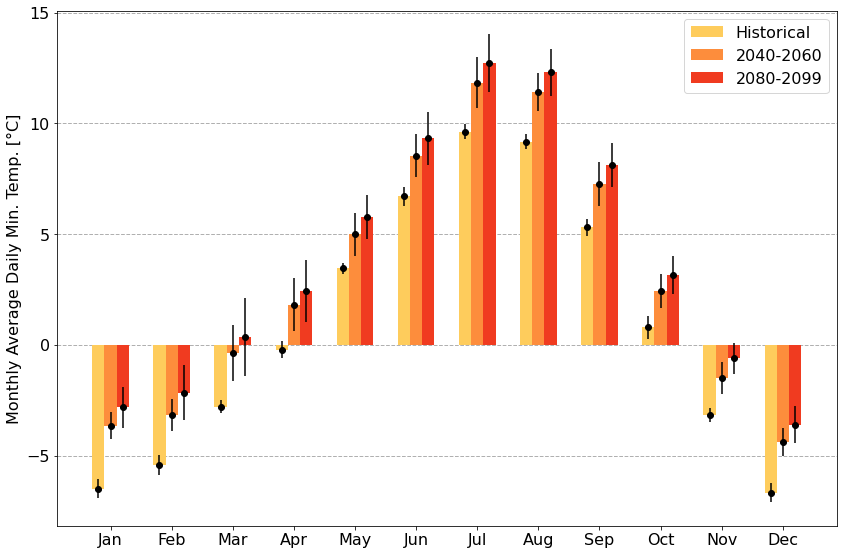

In [12]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width, tmin_seasonal_cycle_hist_np, width, label='Historical', color='#fecc5c', zorder=2.5)
rects2 = ax.bar(x, tmin_seasonal_cycle_40_60_np, width, label='2040-2060', color='#fd8d3c', zorder=2.5)
rects3 = ax.bar(x + width, tmin_seasonal_cycle_80_99_np, width, label='2080-2099', color='#f03b20', zorder=2.5)

rects1 = ax.errorbar(x - width, tmin_seasonal_cycle_hist_np, yerr=tmax_seasonal_cycle_hist_std_np, 
                     fmt='o', color='k', zorder=3)
rects2 = ax.errorbar(x, tmin_seasonal_cycle_40_60_np, yerr=tmax_seasonal_cycle_40_60_std_np,
                     fmt='o', color='k', zorder=3)
rects3 = ax.errorbar(x + width, tmin_seasonal_cycle_80_99_np, yerr=tmax_seasonal_cycle_80_99_std_np, 
                     fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Monthly Average Daily Min. Temp. [°C]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCycleTmin.png', bbox_inches='tight', dpi=300)
plt.show()

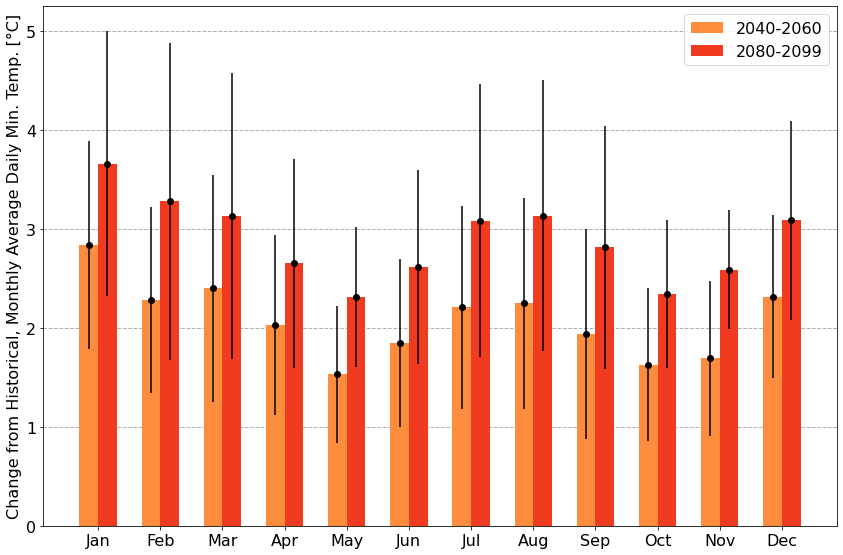

In [13]:
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.rcParams.update({'font.size': 16})

x = np.arange(len(labels))+1  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, tmin_seasonal_cycle_40_60_np - tmin_seasonal_cycle_hist_np, width, 
                label='2040-2060', color='#fd8d3c', zorder=2.5)
rects2 = ax.bar(x + width/2, tmin_seasonal_cycle_80_99_np - tmin_seasonal_cycle_hist_np, width,
                label='2080-2099', color='#f03b20', zorder=2.5)

ax.errorbar(x - width/2, tmin_seasonal_cycle_40_60_np - tmin_seasonal_cycle_hist_np, 
                    yerr=tmin_seasonal_cycle_40_60_std_np, fmt='o', color='k', zorder=3)
ax.errorbar(x + width/2, tmin_seasonal_cycle_80_99_np - tmin_seasonal_cycle_hist_np, 
                    yerr=tmin_seasonal_cycle_80_99_std_np, fmt='o', color='k', zorder=3)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.grid(axis='y', linestyle='--', linewidth=1, zorder=-10)
ax.set_ylabel('Change from Historical, Monthly Average Daily Min. Temp. [°C]')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.savefig('MACA_v2_SeasonalCycleTmin_change.png', bbox_inches='tight', dpi=300)
plt.show()